In [465]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [466]:
fileLocation = '../Downloads/audit_data/audit_risk.csv'
df = pd.read_csv(fileLocation)
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


PreProcessing

In [467]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [468]:
df['Money_Value'].fillna((df['Money_Value'].mean()), inplace = True)

In [469]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

/tmp/ipykernel_17475/2780952878.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


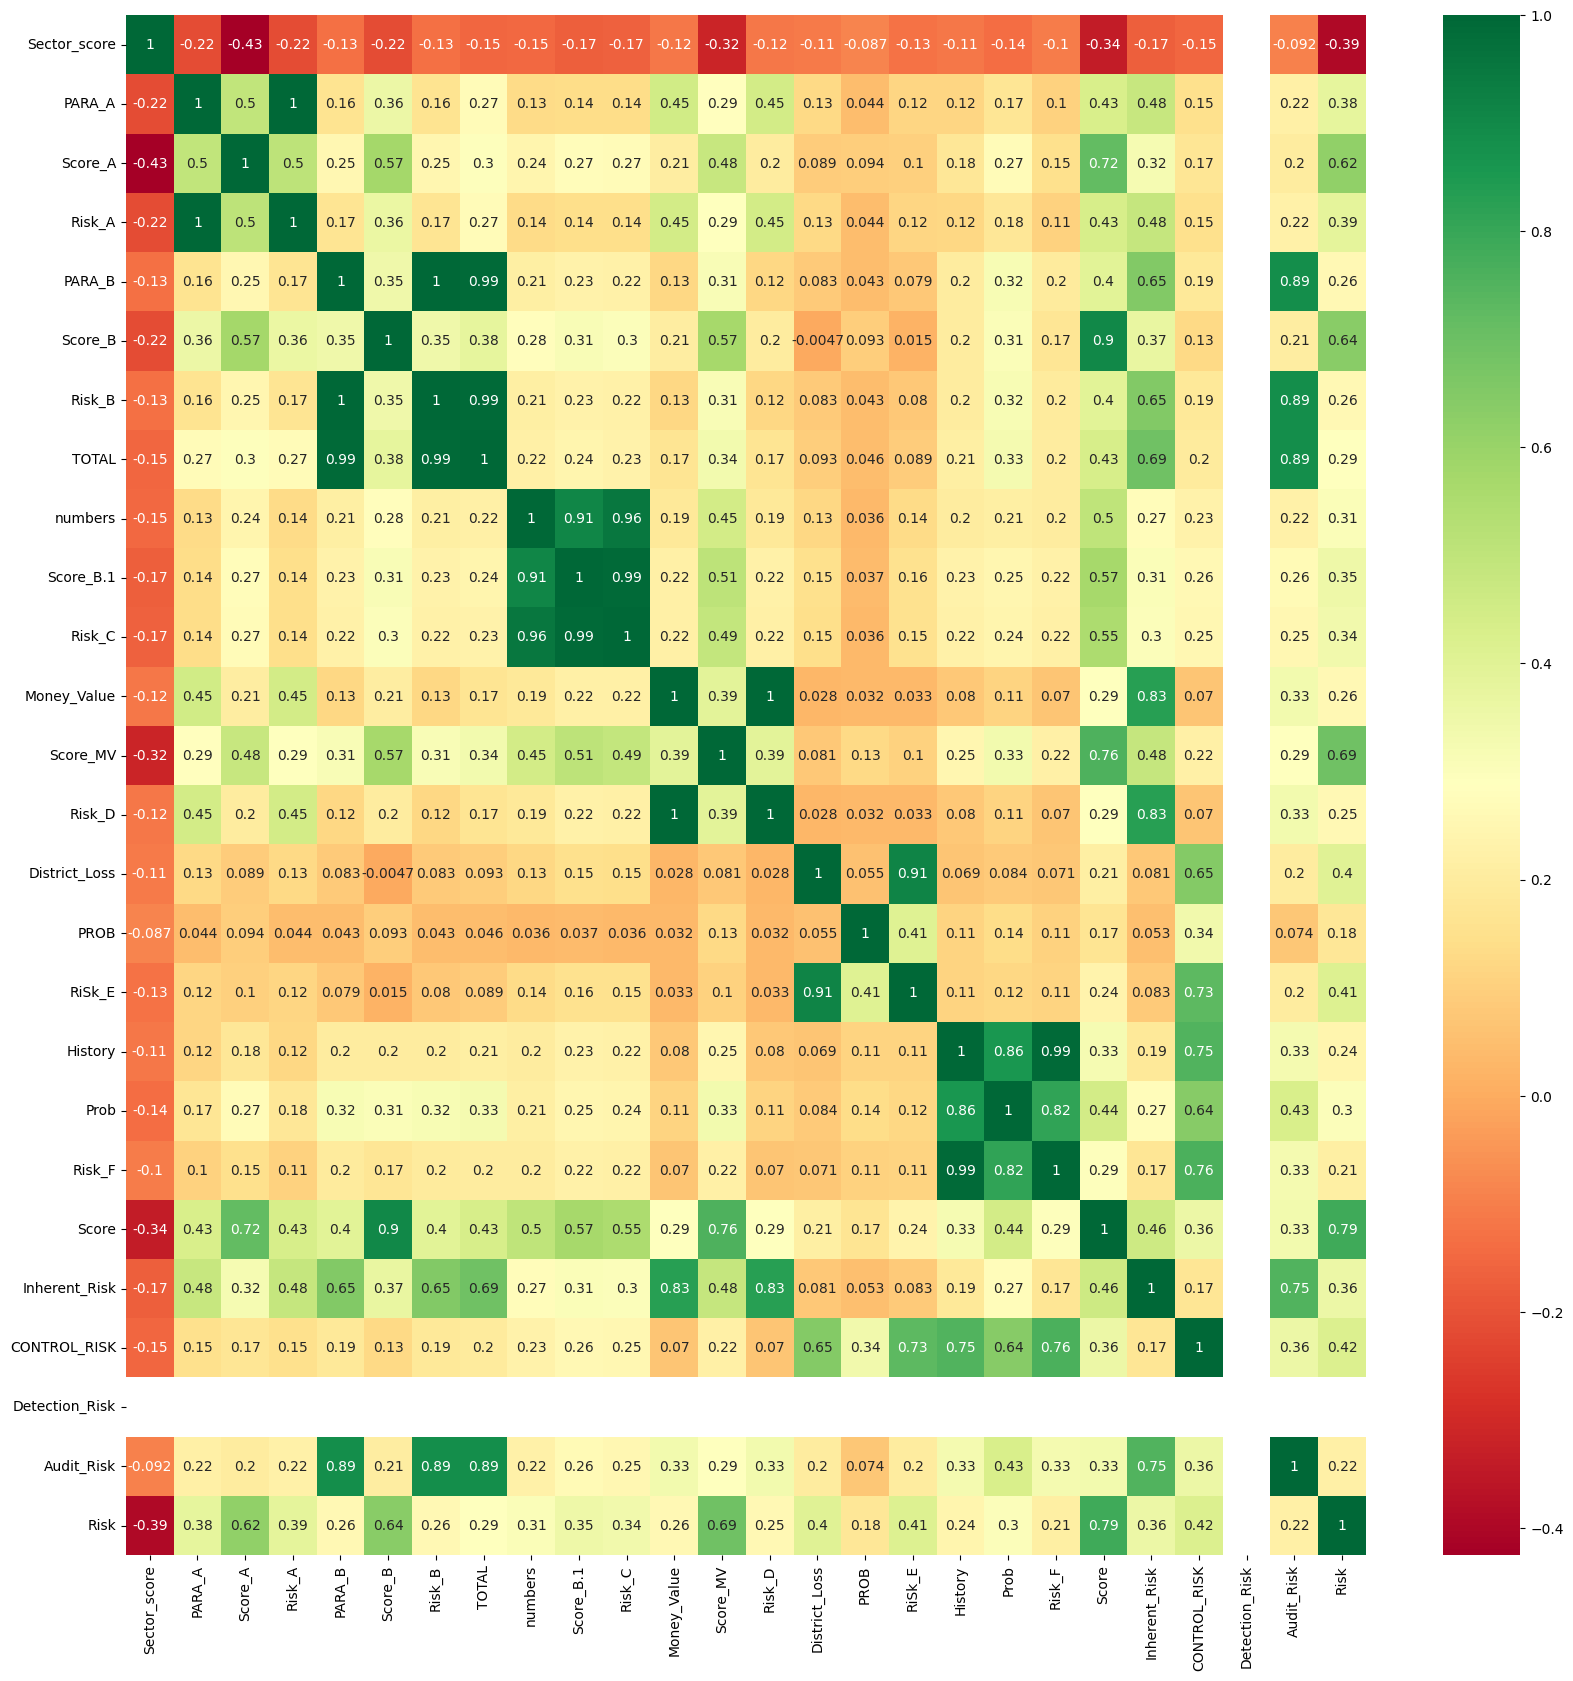

In [470]:
correlation = df.corr()
top_correlation = correlation.index
plt.figure(figsize=(20,20))
x = sns.heatmap(df[top_correlation].corr(),annot=True,cmap="RdYlGn")

In [471]:
df = df.drop(['Detection_Risk'], axis=1)

/tmp/ipykernel_17475/2780952878.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


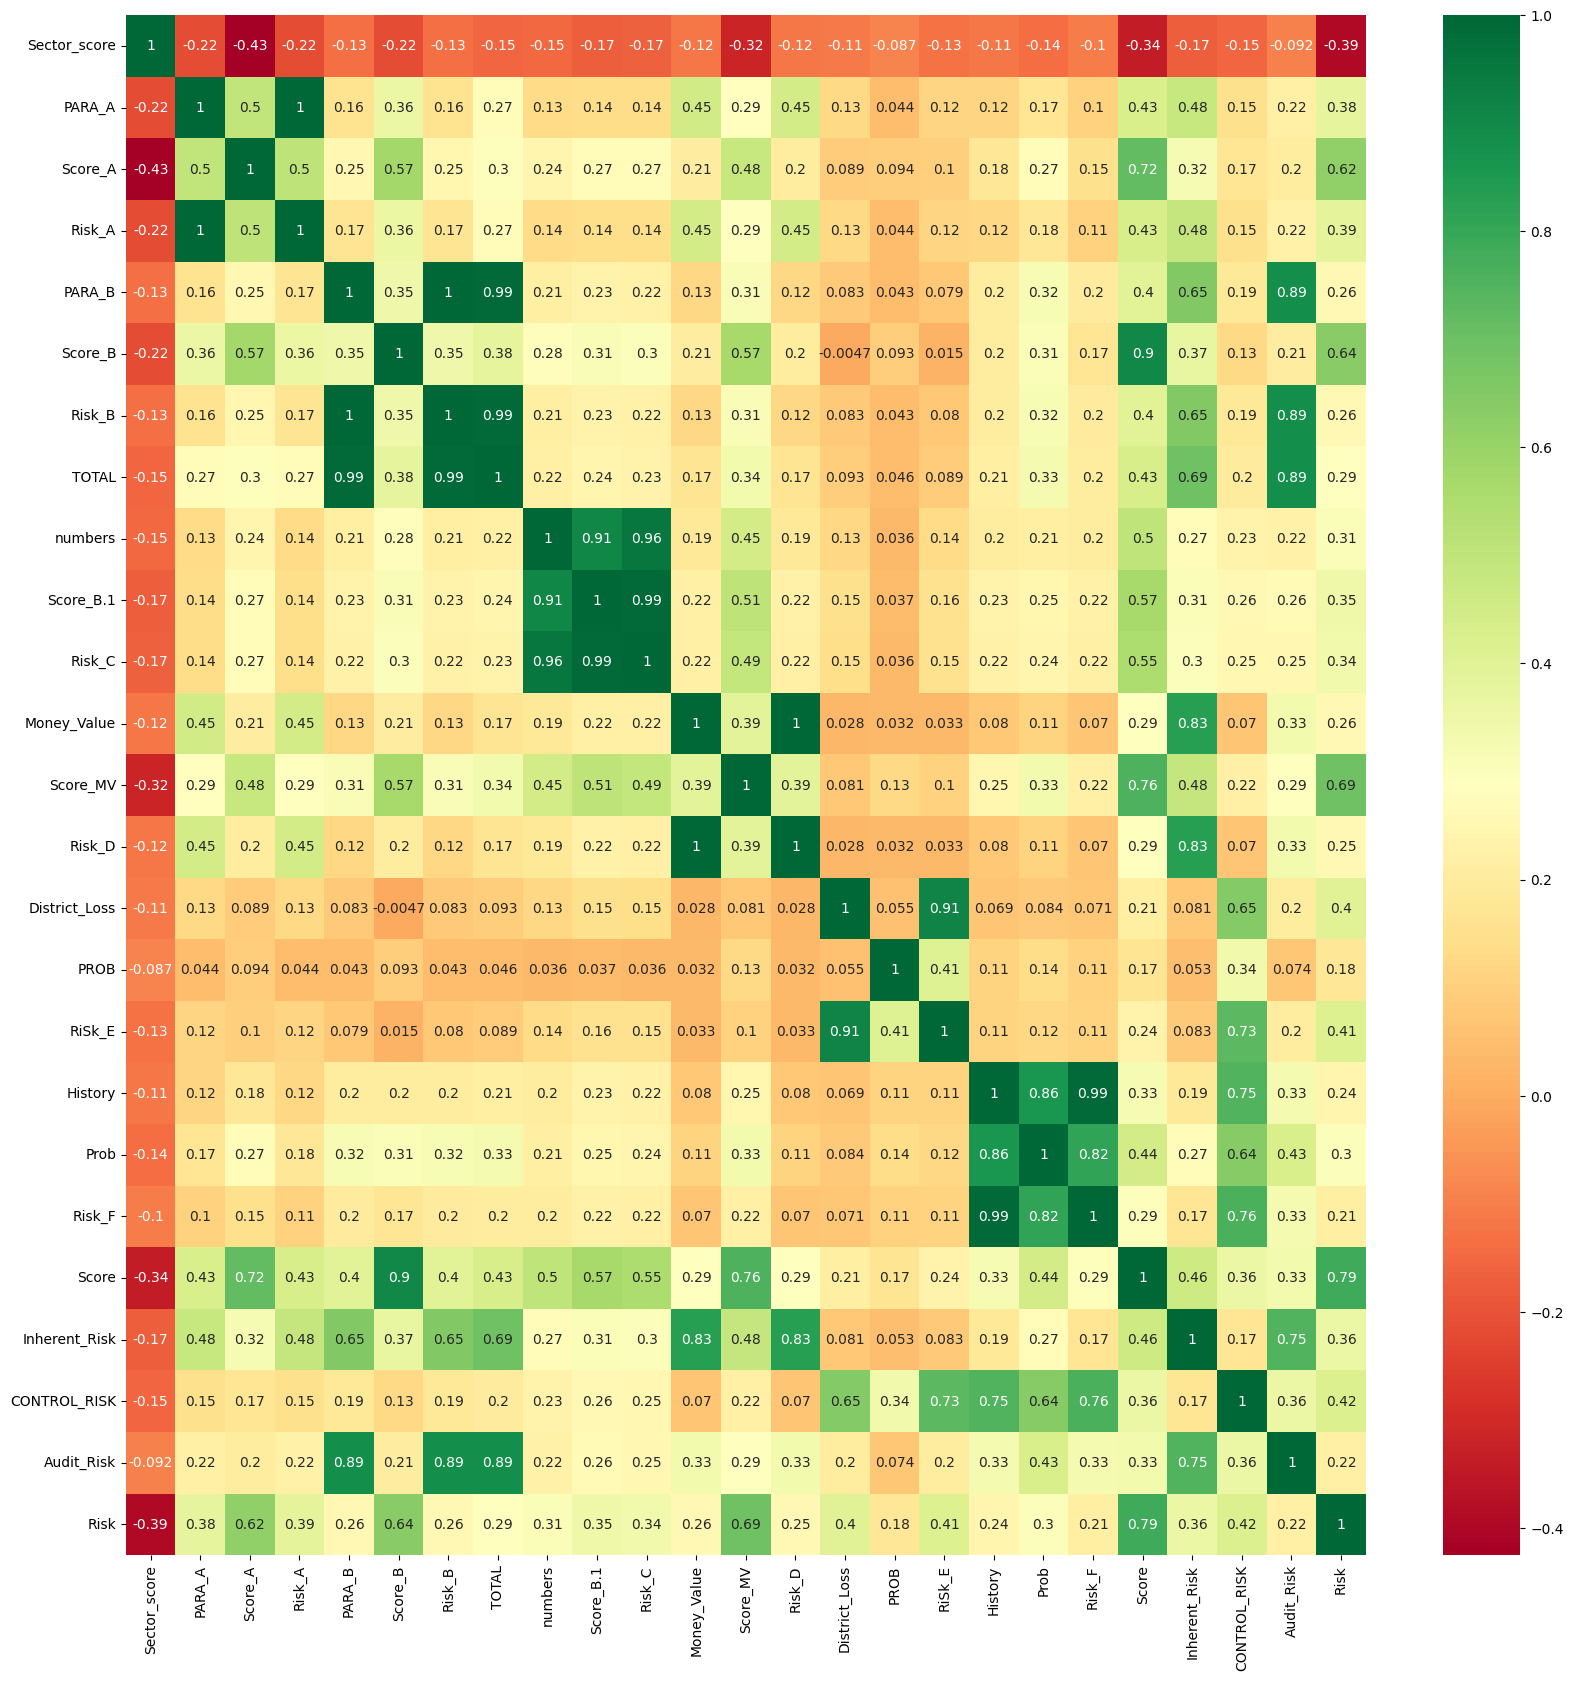

In [472]:
correlation = df.corr()
top_correlation = correlation.index
plt.figure(figsize=(20,20))
x = sns.heatmap(df[top_correlation].corr(),annot=True,cmap="RdYlGn")

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   Score_A        776 non-null    float64
 4   Risk_A         776 non-null    float64
 5   PARA_B         776 non-null    float64
 6   Score_B        776 non-null    float64
 7   Risk_B         776 non-null    float64
 8   TOTAL          776 non-null    float64
 9   numbers        776 non-null    float64
 10  Score_B.1      776 non-null    float64
 11  Risk_C         776 non-null    float64
 12  Money_Value    776 non-null    float64
 13  Score_MV       776 non-null    float64
 14  Risk_D         776 non-null    float64
 15  District_Loss  776 non-null    int64  
 16  PROB           776 non-null    float64
 17  RiSk_E         776 non-null    float64
 18  History   

In [474]:
df['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [475]:
df = df[(df.LOCATION_ID != 'LOHARU')]
df = df[(df.LOCATION_ID != 'NUH')]
df = df[(df.LOCATION_ID != 'SAFIDON')]
df['LOCATION_ID'].fillna((df['LOCATION_ID'].mean()), inplace = True)
df = df.astype(float)
df = df.drop_duplicates(keep = 'first')
df['LOCATION_ID'].unique()

array([23.,  6.,  7.,  8., 13., 37., 24.,  3.,  4., 14.,  5., 20., 19.,
       21., 22.,  9., 11., 12., 29., 30., 38., 31.,  2., 32., 16., 33.,
       15., 36., 34., 18., 25., 39., 27., 35., 40., 41., 42.,  1., 28.,
       43., 44., 17.])

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 775
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   760 non-null    float64
 1   LOCATION_ID    760 non-null    float64
 2   PARA_A         760 non-null    float64
 3   Score_A        760 non-null    float64
 4   Risk_A         760 non-null    float64
 5   PARA_B         760 non-null    float64
 6   Score_B        760 non-null    float64
 7   Risk_B         760 non-null    float64
 8   TOTAL          760 non-null    float64
 9   numbers        760 non-null    float64
 10  Score_B.1      760 non-null    float64
 11  Risk_C         760 non-null    float64
 12  Money_Value    760 non-null    float64
 13  Score_MV       760 non-null    float64
 14  Risk_D         760 non-null    float64
 15  District_Loss  760 non-null    float64
 16  PROB           760 non-null    float64
 17  RiSk_E         760 non-null    float64
 18  History   

In [477]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
0,3.89,23.0,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.2,0.4,0.0,0.2,0.0,2.4,8.574,0.4,1.7148,1.0
1,3.89,6.0,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0.0,0.2,0.0,2.0,2.554,0.4,0.5108,0.0
2,3.89,6.0,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.2,0.4,0.0,0.2,0.0,2.0,1.548,0.4,0.3096,0.0
3,3.89,6.0,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.2,0.4,0.0,0.2,0.0,4.4,17.530,0.4,3.5060,1.0
4,3.89,6.0,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2,0.4,0.0,0.2,0.0,2.0,1.416,0.4,0.2832,0.0


Train

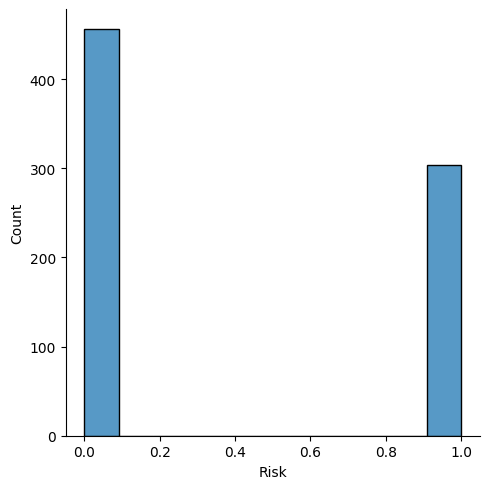

In [478]:
sns.displot(df['Risk'])

In [479]:
data = df.drop(['Audit_Risk'], axis=1)
x = data.drop(['Risk'], axis=1)
y = data['Risk']

In [480]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)
#Train dan Split data Menjadi 20% dan 80%, disini juga saya menggunakan StandardScaler

In [481]:
pca = PCA(n_components=0.95)
x_train_reduced = pca.fit_transform(x_train_scaled)
x_test_reduced = pca.fit_transform(x_test_scaled)
#mereduce train dan test data

In [482]:
model = tf.keras.Sequential (
    [   
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(256),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(32),
        tf.keras.layers.Dense(16),
        tf.keras.layers.Dense(8),    
        tf.keras.layers.Dense(4),        
        tf.keras.layers.Dense(2),        
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ]
)

model.compile(loss = 'binary_crossentropy', optimizer = tf.optimizers.Adam(learning_rate=0.0000005), metrics = ['accuracy', 'Precision', 'Recall'])
#dengan menggunakan library keras saya membuat 1 input dan 1 iutput dengan 8 hidden layer, kemudian mengcompilenya binary dengan optimizer adam

In [483]:
target = 0.9
class callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= target:
            print('\nEpoch', epoch, '\nTotal Akurasi = %2.2f%%' %(logs['accuracy']*100), 'proses training telah selesai.')
            self.model.stop_training = True
callback = callbacks()

history = model.fit(x_train_reduced, y_train, epochs = 1000, callbacks=[callback])
#disini saya callback terus menerus sampai mencapai target yang susah saya set 90%

Epoch 1/1000
19/19 [==============================] - 1s 2ms/step - loss: 0.6477 - accuracy: 0.5559 - precision: 0.4688 - recall: 0.8354
Epoch 2/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.5707 - precision: 0.4788 - recall: 0.8354
Epoch 3/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.5938 - precision: 0.4952 - recall: 0.8477
Epoch 4/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.6196 - accuracy: 0.6053 - precision: 0.5036 - recall: 0.8519
Epoch 5/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.6201 - precision: 0.5149 - recall: 0.8519
Epoch 6/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.6365 - precision: 0.5281 - recall: 0.8519
Epoch 7/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.6530 - precision: 0.5417 - recall: 0.8560
Epoch 8/1000
19/19 [=====================

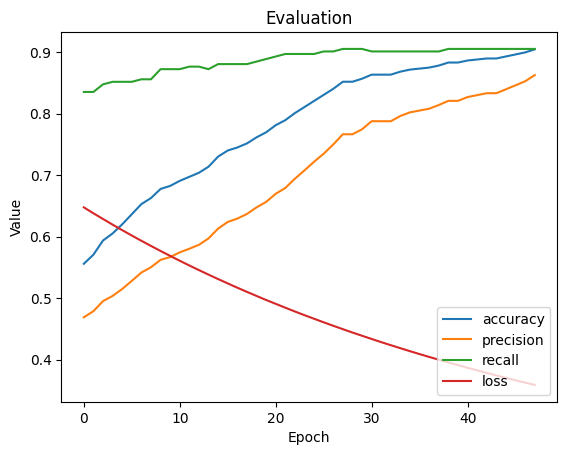

In [484]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.plot(history.history['loss'])

plt.title('Evaluation')
plt.ylabel('Value')
plt.xlabel('Epoch')

plt.legend(['accuracy', 'precision', 'recall', 'loss'], loc='lower right')
plt.show()

In [485]:
y_train_pred = model.predict(x_train_reduced)
y_test_pred = model.predict(x_test_reduced)
#dari model prediksi train dan test saya masukkan ke train dan test prediksi

5/5 [==============================] - 0s 2ms/step


In [486]:
y_train_pred_class = [1 if prob > 0.5 else 0 for prob in np.ravel(y_train_pred)]
y_test_pred_class = [1 if prob > 0.5 else 0 for prob in np.ravel(y_test_pred)]

In [487]:
y_train_pred_class[:10], y_test_pred_class[:10]

([1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

In [488]:
print(confusion_matrix(y_train,y_train_pred_class))
print(confusion_matrix(y_test,y_test_pred_class))

[[330  35]
 [ 22 221]]
[[86  5]
 [16 45]]


In [489]:
print(f'Accuracy : {accuracy_score(y_test, y_test_pred_class)*100:.2f}%')
print(f'Precision : {precision_score(y_test, y_test_pred_class)*100:.2f}%')
print(f'Recall : {recall_score(y_test, y_test_pred_class)*100:.2f}%')

Accuracy : 86.18%
Precision : 90.00%
Recall : 73.77%
